### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Weightlifting']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 13654    Weightlifting
13655    Weightlifting
13656    Weightlifting
13657    Weightlifting
13658    Weightlifting
             ...      
14444    Weightlifting
14445    Weightlifting
14446    Weightlifting
14447    Weightlifting
14448    Weightlifting
Name: Sport, Length: 795, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 13654      NA
13655      NA
13656      NA
13657      NA
13658      NA
         ... 
14444      NA
14445    Gold
14446      NA
14447      NA
14448      NA
Name: Medal, Length: 795, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 13654 to 14448
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      795 non-null    int64  
 1   Unnamed: 0_x    795 non-null    int64  
 2   ID              795 non-null    int64  
 3   Name            795 non-null    object 
 4   Sex             795 non-null    object 
 5   Age             795 non-null    float64
 6   Height          795 non-null    float64
 7   Weight          795 non-null    float64
 8   NOC             795 non-null    object 
 9   Games           795 non-null    object 
 10  Year            795 non-null    int64  
 11  Season          795 non-null    object 
 12  City            795 non-null    object 
 13  Sport           795 non-null    object 
 14  Event           795 non-null    object 
 15  Medal           795 non-null    object 
 16  Team            795 non-null    object 
 17  Unnamed: 0_y    795 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (596, 1) (596, 5)
Test Set  : (199, 1) (199, 5)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Height,GDP,Population,GDP Per Capita,Medal
13682,23.0,160.0,3.662790e+10,26316609.0,1391.816923,NA
14384,30.0,183.0,3.540000e+12,80425823.0,44015.713709,NA
13773,22.0,170.0,1.231978e+10,2900401.0,4247.614308,NA
13975,32.0,193.0,1.203002e+10,25864350.0,465.119887,NA
14257,23.0,163.0,3.810000e+11,29400000.0,12959.183673,NA
...,...,...,...,...,...,...
14351,24.0,186.0,3.617989e+10,5662544.0,6389.334143,NA
14145,27.0,168.0,5.430000e+11,236159276.0,2299.295667,NA
13862,30.0,168.0,1.860000e+13,323127513.0,57562.414996,NA
14262,26.0,173.0,6.170181e+10,3810605.0,16192.129596,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        675
Silver     40
Bronze     40
Gold       40
Name: Medal, dtype: int64


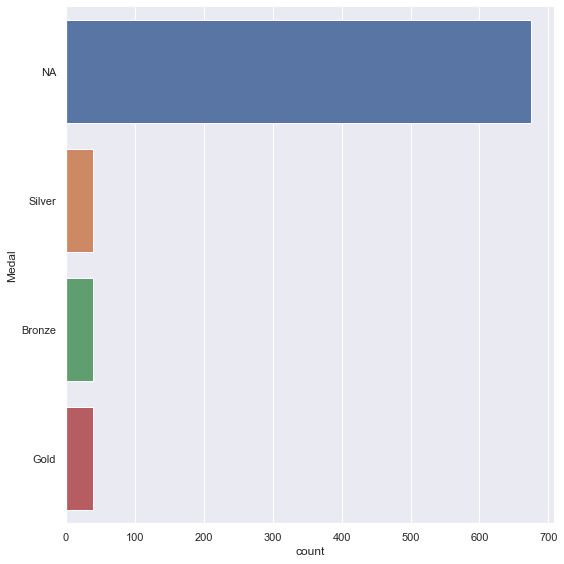

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(596, 5) (596, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(2048, 5) (2048, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Height,GDP,Population,GDP Per Capita,Medal
0,23.000000,160.000000,3.662790e+10,2.631661e+07,1391.816923,NA
1,30.000000,183.000000,3.540000e+12,8.042582e+07,44015.713709,NA
2,22.000000,170.000000,1.231978e+10,2.900401e+06,4247.614308,NA
3,32.000000,193.000000,1.203002e+10,2.586435e+07,465.119887,NA
4,23.000000,163.000000,3.810000e+11,2.940000e+07,12959.183673,NA
...,...,...,...,...,...,...
2043,26.437695,165.188475,3.115515e+12,1.308584e+09,2370.291078,Silver
2044,26.389914,172.779827,5.847445e+10,1.024088e+07,5922.070080,Silver
2045,27.439664,176.662569,3.869130e+10,1.383541e+07,2763.738677,Silver
2046,23.631733,173.736534,7.664092e+11,7.838595e+07,9749.858886,Silver


In [17]:
X_test

,Age,Height,GDP,Population,GDP Per Capita
14079,20.0,184.0,7.884519e+10,75381899.0,1045.943208
13726,24.0,167.0,4.885248e+10,8763400.0,5574.603802
13771,19.0,175.0,3.743853e+10,22442971.0,1668.162731
13923,24.0,175.0,2.080000e+11,16791425.0,12387.275053
13748,23.0,180.0,1.140000e+12,56942108.0,20020.333634
...,...,...,...,...,...
14074,29.0,179.0,3.910000e+11,8747358.0,44699.210893
14196,28.0,182.0,5.910000e+11,144067054.0,4102.256440
14090,26.0,160.0,3.160000e+11,27600000.0,11449.275362
14287,26.0,197.0,1.760000e+11,45593300.0,3860.216304


Number of Medal Types : 4
Bronze    512
Gold      512
NA        512
Silver    512
Name: Medal, dtype: int64


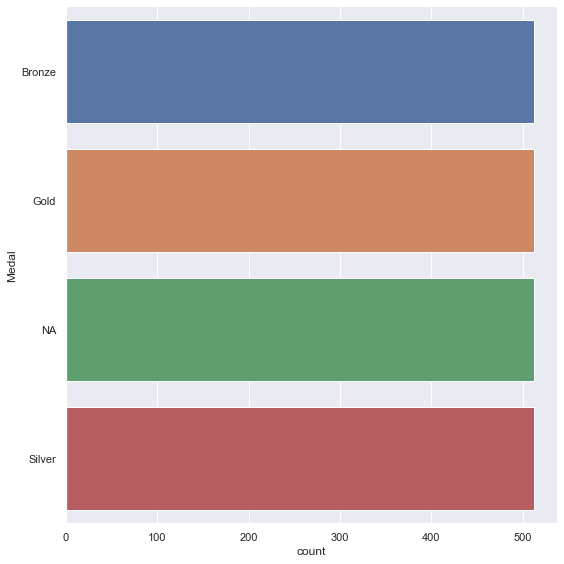

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1536, 1) (1536, 5)
Test Set  : (512, 1) (512, 5)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.978515625

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.861328125



<AxesSubplot:>

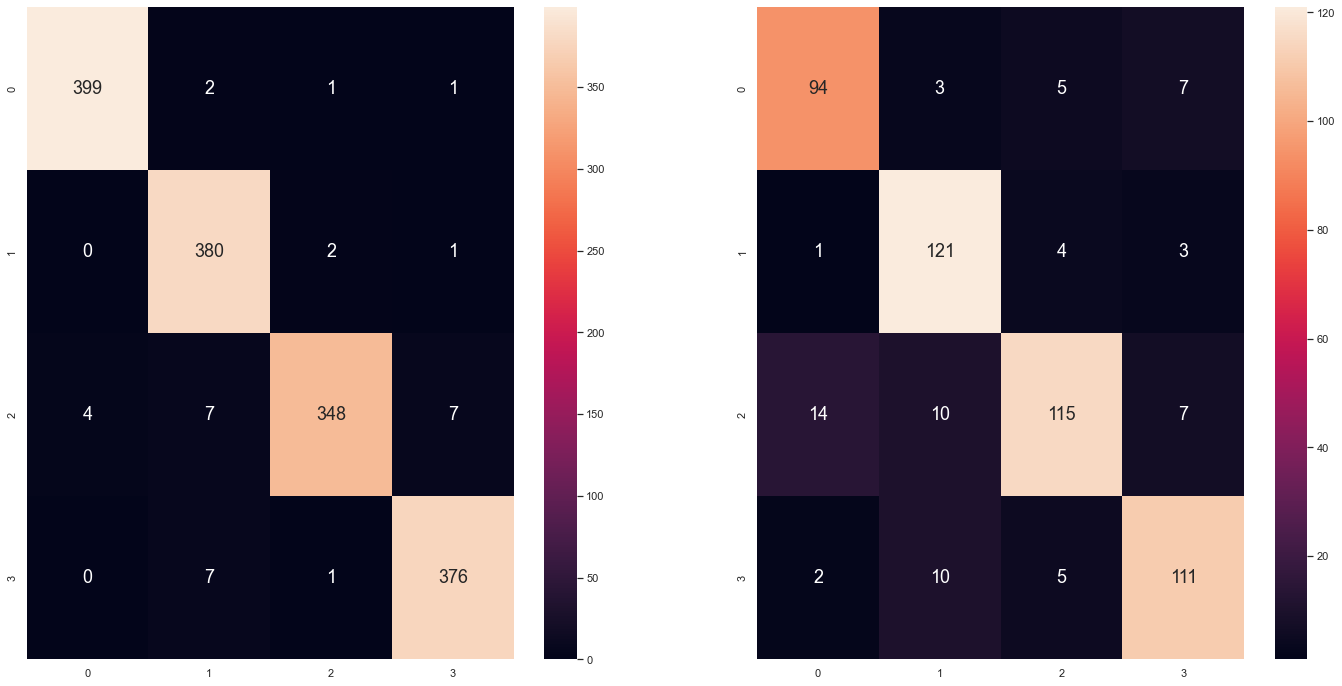

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

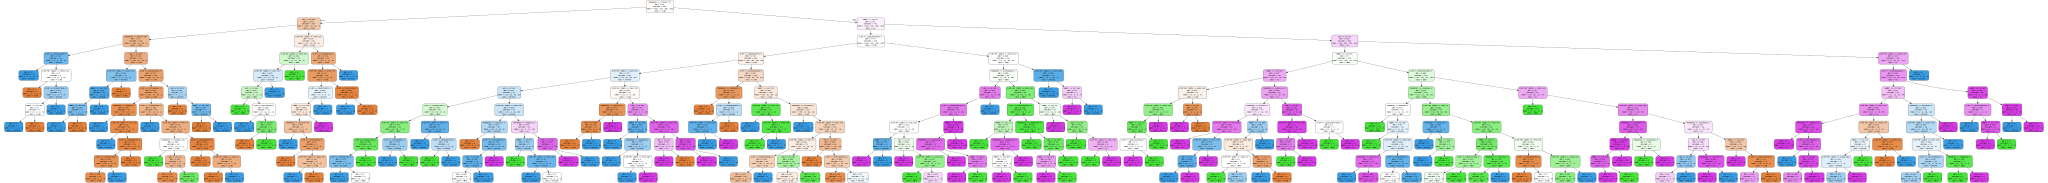

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
graph.render("Tree_male_WEIGHTLIFTING")

'Tree_male_WEIGHTLIFTING.pdf'

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.6231155778894473


<AxesSubplot:>

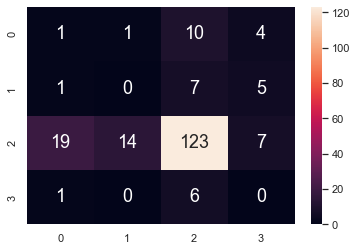

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})